In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
dateParser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
dataset = pd.read_csv("./datasets/final/final-formed-auvergrid.csv", delimiter=',', date_parser=dateParser, parse_dates=['Timestamp'])

print(f"Dataset shape: {dataset.shape}")

Dataset shape: (8760, 7)


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Timestamp      8760 non-null   datetime64[ns]
 1   CPUTime        8760 non-null   int64         
 2   Memory         8760 non-null   int64         
 3   NJobs          8760 non-null   int64         
 4   NProcs         8760 non-null   int64         
 5   ArrivedJobs    8760 non-null   int64         
 6   CompletedJobs  8760 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 479.2 KB


In [4]:
dataset["Hour"] = dataset["Timestamp"].map(lambda timestamp: timestamp.hour)
dataset["Day"] = dataset["Timestamp"].map(lambda timestamp: timestamp.day)
dataset["Month"] = dataset["Timestamp"].map(lambda timestamp: timestamp.month)
dataset["Year"] = dataset["Timestamp"].map(lambda timestamp: timestamp.year)

dataset.drop(columns=["Timestamp"], inplace=True)

dataset.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,Hour,Day,Month,Year
0,157109,705984,6,6,6,2,1,1,1,2006
1,175300,1172836,11,11,7,2,2,1,1,2006
2,175300,1107780,20,12,11,10,3,1,1,2006
3,175300,1101404,10,10,0,0,4,1,1,2006
4,175300,1101404,10,10,0,0,5,1,1,2006


In [5]:
labels = {"CPUTime": list(dataset.loc[1:,"CPUTime"]),
          "Memory": list(dataset.loc[1:,"Memory"]),
          "NJobs": list(dataset.loc[1:,"NJobs"]),
          "NProcs": list(dataset.loc[1:,"NProcs"]),
          "ArrivedJobs": list(dataset.loc[1:,"ArrivedJobs"]),
          "CompletedJobs": list(dataset.loc[1:,"CompletedJobs"]),}
labels = pd.DataFrame(labels)
features = dataset.loc[:len(dataset)-2]

In [6]:
features.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs,Hour,Day,Month,Year
0,157109,705984,6,6,6,2,1,1,1,2006
1,175300,1172836,11,11,7,2,2,1,1,2006
2,175300,1107780,20,12,11,10,3,1,1,2006
3,175300,1101404,10,10,0,0,4,1,1,2006
4,175300,1101404,10,10,0,0,5,1,1,2006


In [7]:
labels.head()

,CPUTime,Memory,NJobs,NProcs,ArrivedJobs,CompletedJobs
0,175300,1172836,11,11,7,2
1,175300,1107780,20,12,11,10
2,175300,1101404,10,10,0,0
3,175300,1101404,10,10,0,0
4,175300,1101404,10,10,0,1


In [8]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

analysis = LinearRegression()
analysis.fit(train, train_labels)

preds = analysis.predict(test)

score = analysis.score(test, test_labels)
score


0.8424469541352875

In [10]:
from sklearn.metrics import mean_absolute_percentage_error

print(list(labels.columns))
print(mean_absolute_percentage_error(preds, test_labels, multioutput='raw_values'))

['CPUTime', 'Memory', 'NJobs', 'NProcs', 'ArrivedJobs', 'CompletedJobs']
[0.12393719 0.13750731 0.12740359 0.12306961 0.62531191 0.47045262]


Analysis for CPUTime


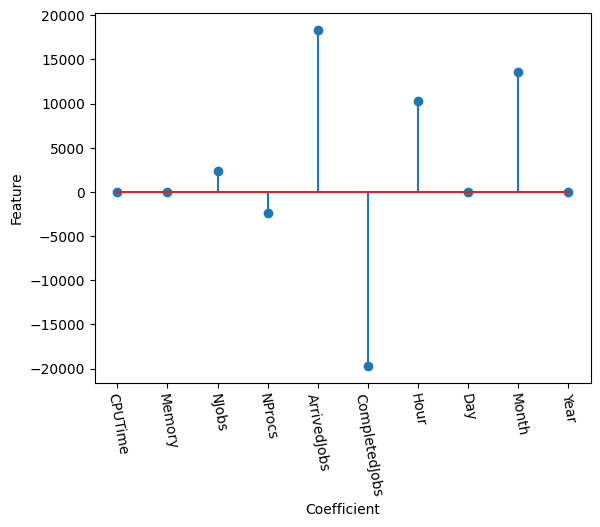

Analysis for Memory


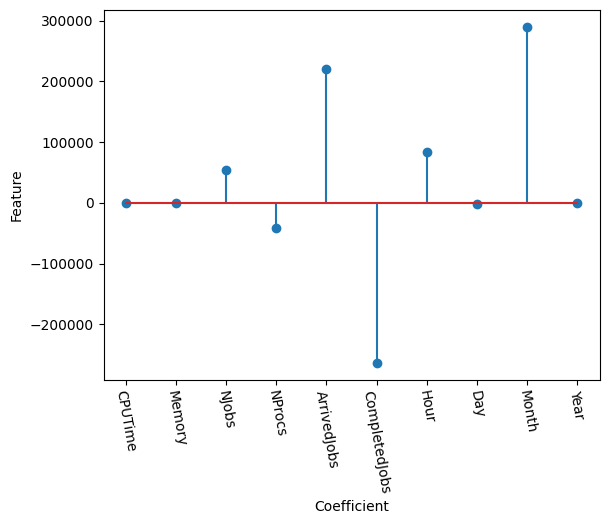

Analysis for NJobs


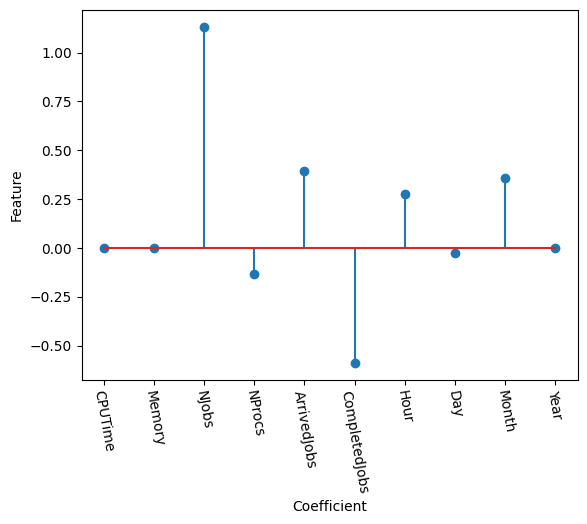

Analysis for NProcs


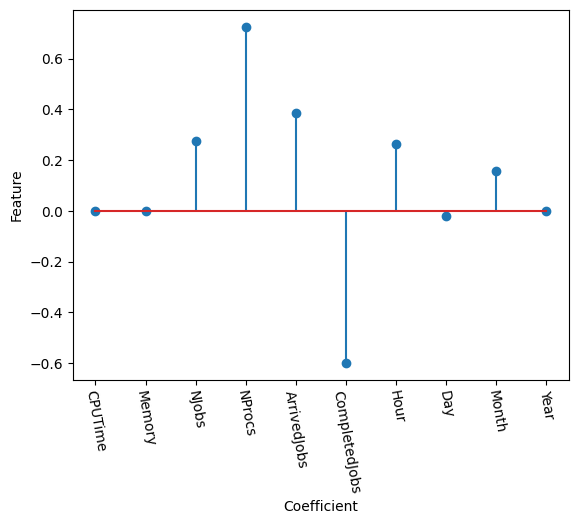

Analysis for ArrivedJobs


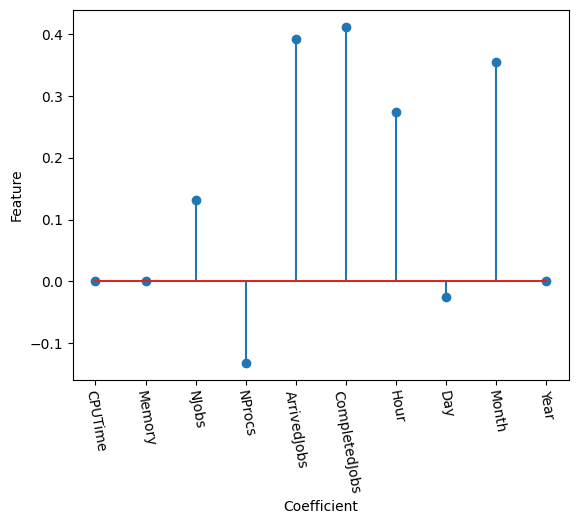

Analysis for CompletedJobs


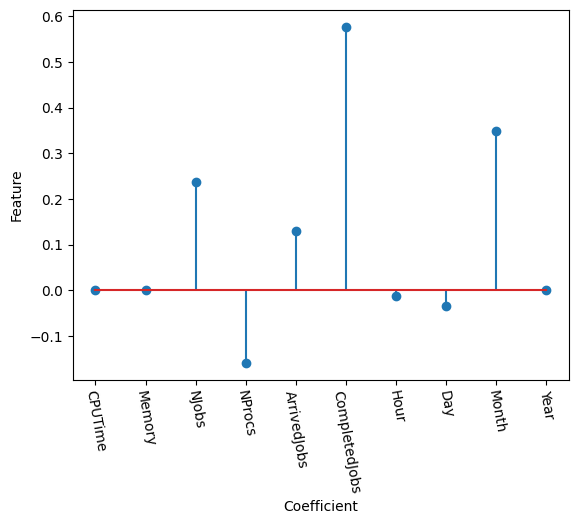

In [11]:
import matplotlib.pyplot as plt

for i in range(labels.shape[1]):
    print(f"Analysis for {labels.columns[i]}")
    plt.stem(train.columns, analysis.coef_[i])
    plt.xlabel("Coefficient")
    plt.ylabel('Feature')
    plt.xticks(rotation = 280)
    plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

analysis = MultiOutputRegressor(RandomForestRegressor())
analysis.fit(train, train_labels)

preds = analysis.predict(test)

score = analysis.score(test, test_labels)
score


0.8431253172834244

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

print(list(labels.columns)[0:3])
print(mean_absolute_percentage_error(preds, test_labels, multioutput='raw_values')[0:3])

['CPUTime', 'Memory', 'NJobs']
[0.12216096 0.14205347 0.12774707]
